In [1]:
#Import Libraries

import csv
import random
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
import seaborn as sns 

%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean

# Aim of Notebook

- Identify the various way that coronaviruses can be transmitted 
- Organize the transmission factors into groups (i.e. clusters) that will help visualize how factors are related
- Using the clusters suggest methods that can limit transmission

# Read in Data 

In [2]:
# load the meta data from the CSV file 
df=pd.read_csv('metadata.csv', usecols=['title','abstract','authors','doi','publish_time'])
print (df.shape)

(45774, 5)


# Clean Data

In [3]:
#drop duplicates
df = df.drop_duplicates(subset='abstract', keep="first")

#drop NANs 
df=df.dropna()

# convert abstracts to lowercase
df["abstract"] = df["abstract"].str.lower()
df.reset_index(drop=True, inplace=True)
df.head()


,title,doi,abstract,publish_time,authors
0,SIANN: Strain Identification by Alignment to N...,10.1101/001727,next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...
1,Spatial epidemiology of networked metapopulati...,10.1101/003889,an emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li
2,Sequencing of the human IG light chain loci fr...,10.1101/006866,germline variation at immunoglobulin gene (ig)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...
3,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol
4,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen


In [4]:
# clean the abstracts by removing punctuation. Numbers were not removed as most of the treatment names had numbers in them. 
clean_abstract =[]
for i in range (df.shape[0]):
    tx = str(df["abstract"][i]).replace('!','').replace('.','').replace("'",'')
    tx = tx.replace('(','').replace(')','').replace('[', '').replace(']', '').replace('{', '').replace('}', '')
    tx = tx.replace('/','')
    tx = tx.replace('&','')
    clean_abstract.append(tx)

In [5]:
# update the abstract column with the cleaned abstract 
df['abstract'] = clean_abstract

# Transmission Factors Associated with Coronaviruses

The transmission factors of coronaviruses were obtained from multiple websites. Many of the transmission modes seen below are based on the SARS outbreak
- https://www.cdc.gov/sars/about/faq.html
- http://sarsreference.com/sarsref/trans.htm
- https://www.quebec.ca/en/health/health-issues/a-z/general-information-about-coronavirus/#c46363
- https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30154-9/fulltext

The main transmission modes of COVID are person-to-person interactions and droplets. Contact can come in many forms ranging from family to workers. The virus is also believed to transmit from animal (specifically bats) to human. 

In [6]:
factors = ['family','contact','droplets','zoonotic','kissing', 'hugging','route','surfaces','countries',\
           'cross-species','animals','human-to-human','person-to-person',"food",'bats','hosts','humans',\
           'patients','arthropod-borne','flaviviruses',"ticks","tick-borne","pathogens",'vector-borne',\
           'bites','water','individuals','bat-borne','dogs','mosquitoes', 'transfusion',\
           'rodents','workers','pigs','fomites','agents',"persons","genus",\
           'airborne', 'flight', 'zoonosis', 'healthcare workers', 'indirect contact', 'oral-fecal', 'sewage',\
           'superspreaders','military', 'travel groups', 'religious gatherings', 'funerals', 'asymptomatic patients',\
           'symptomatic patients', 'fluids']

In [7]:
factor_count = dict((factor,0) for factor in factors)

for factor in factor_count:
    for abstract in df['abstract']:
        if str(factor) in abstract:
            factor_count[factor] += 1

# 2.0 - Exploratory Analysis

Four graphs were visualized to better understand the relationship between transmission factors and the research articles in the corpus

## 2.1 General Prevelant Transmission Modes - Articles from 1951-2020

Let's determine which transmission factors are most common by examining the entire corpus regardless of when the article was posted. 

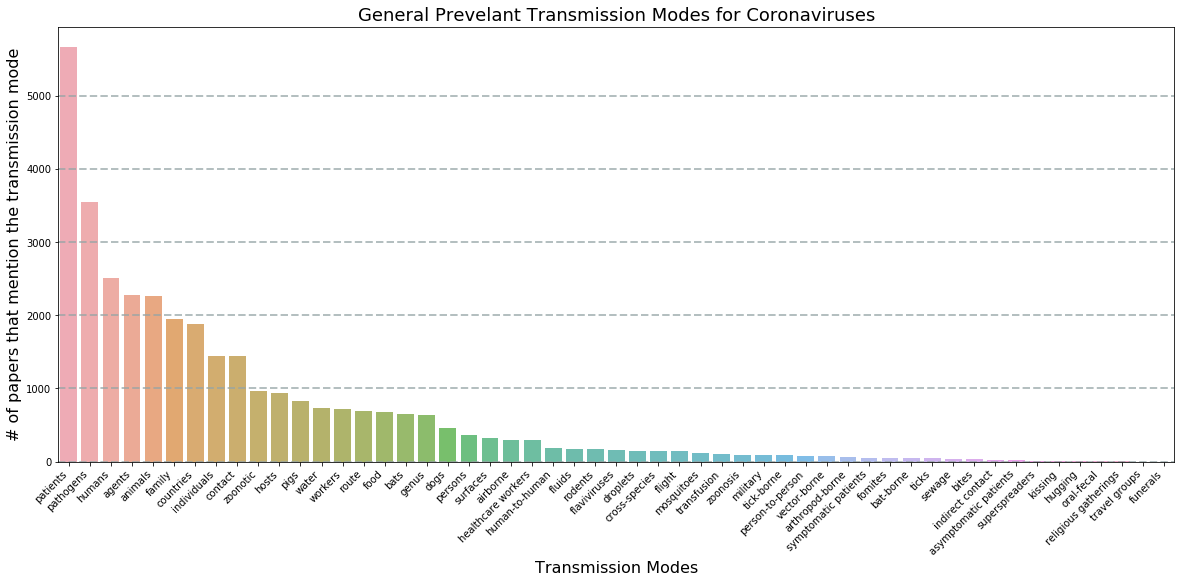

In [8]:
x = sorted(factor_count, key=factor_count.get, reverse=True)
y = sorted(factor_count.values(), reverse=True)
plt.figure(figsize=(20,8))
sns.barplot(x,y, alpha=0.8)
plt.title('General Prevelant Transmission Modes for Coronaviruses',fontsize=18)
plt.ylabel('# of papers that mention the transmission mode', fontsize=16)
plt.xlabel('Transmission Modes', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

## 2.2 Prevelant Transmission Modes Today - Articles from 2019-2020

It would also be interesting to compare the transmission count for articles posted recently. It is assumed that recent articles (dated from Nov.2019 - Mar.2020) are COVID-19 related. 

#### Note: November 2019 is when the first COVID-19 was reported; which is why the date threshold started at Nov.2019

In [9]:
df_today = df[(df['publish_time'] > '2019-11-01') & (df['publish_time'] < '2020-03-31')]

In [10]:
factor_count = dict((factor,0) for factor in factors)

for factor in factor_count:
    for abstract in df_today['abstract']:
        if str(factor) in abstract:
            factor_count[factor] += 1

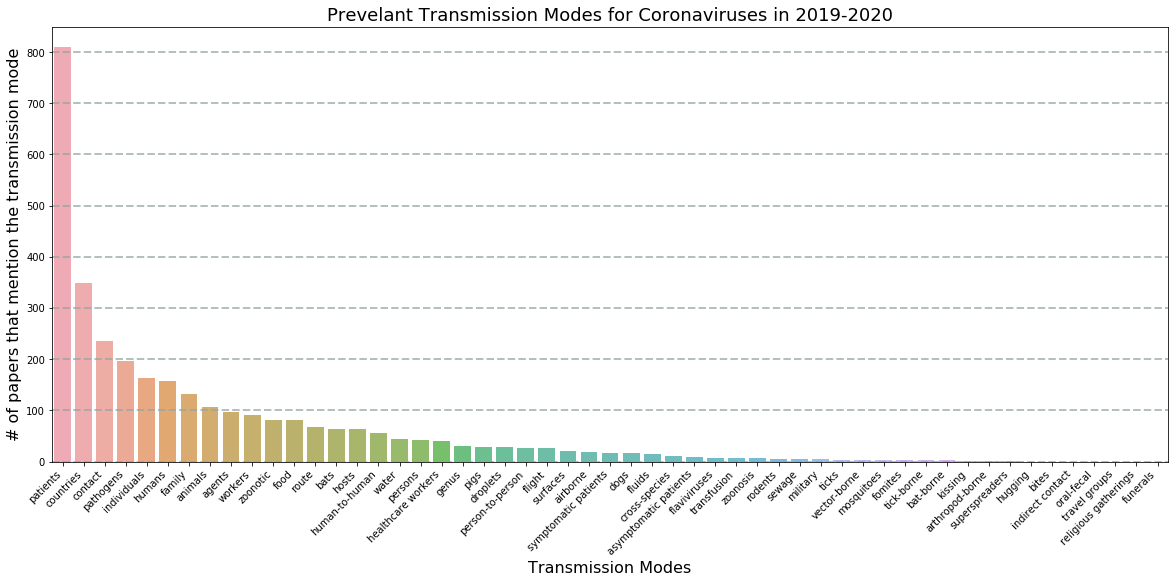

In [11]:
x_today = sorted(factor_count, key=factor_count.get, reverse=True)
y_today = sorted(factor_count.values(), reverse=True)
plt.figure(figsize=(20,8))
sns.barplot(x_today,y_today, alpha=0.8)
plt.title('Prevelant Transmission Modes for Coronaviruses in 2019-2020',fontsize=18)
plt.ylabel('# of papers that mention the transmission mode', fontsize=16)
plt.xlabel('Transmission Modes', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

There are a handful of key differences between the two graphs above:
- category contact is more prevelant in the 2019-2020 dataset, which correlates with the current belief that COVID-19 aggressively spreads through contact
- human-to-human and person-to-person have a largely count in 2019-2020. This once again aligns with COVID-19 transmission
- tranmission through asymptomatic and symptomatic patients are also slighly higher in 2019-2020. This makes sense and is the driving force behind social distance

Despite the key difference between two graphs, they are still quite similar and thus the general dataset will be used as it might include useful clustering information (i.e. provide more insight), that will otherwise not be found in the recent articles. 

From the graph above, it can be seen that certain tranmission factors have a small count, these will be dropped as their count indicates that they are not a driving force behind Covid. Thus only modes that have a count higher than 100 will be explored. 

In [12]:
y = np.array(y)
y_important = y[y>=100] # filter count 
x_important = x[0:len(y_important)] # filter transmission modes based on filtered count

# Transmission Modes based on Age Groups

Let's know try to extract the different age groups studied in documents. These groups will then be used to see if there is visualize any difference in transmission between the age groups.

For the age range, it was specified that smallest number in the range can't be smaller than 5 years old and the higest number of the group can't be bigger than 95. This is done to filter out noisey numbers and to accurately extract age. 

In [13]:
import re
import warnings
warnings.filterwarnings("ignore")
range_age =[]
for i in range(df.shape[0]):
    
    text = df['abstract'].values[i]
    index = text.find('years')
    if index == -1:
        "" 
    else: 
        experience_text = text[index-7:index]
        years_ = re.findall('([0-9]+)', experience_text)
        
        if len(years_)==2:
            exp_year = int(years_[1]) # max number 
            exp_year_min = int(years_[0]) # min number
        
        #remove bad numbers
            if exp_year>95:
                ""
            elif exp_year<5:
                ""
            elif exp_year_min<5:
                ""
            elif exp_year_min>95:
                ""
            else:
                range_age.append(years_[0]+'-'+years_[1])
            
        else:
            ""

In [14]:
# the terms years was added to the age groups so that I can accurately find a correlation between age and transmission mode
# if I input just an number range the code won't be able to differeniate between an age range and a number range in the text 
# so the term years was added to give context
new_range_age = []
for i in range(len(range_age)):
    new_range_age.append(range_age[i] + ' years')

#### Code Run time = 10 mins

In [15]:
range_age = new_range_age
age = []
trans = []
for i in range(len(x_important)):
    for j in range(len(range_age)):
        for abstract in df['abstract']:
            if ((str(range_age[j]) in abstract) and (x_important[i] in abstract)):
                age.append(range_age[j])
                trans.append(x_important[i])

            elif (((str(range_age[j]) in abstract) and (x_important[i] not in abstract)) or ((str(range_age[j]) not in abstract) and (x_important[i] in abstract))):
                age.append(range_age[j])
                trans.append('None')

Many age groups were extracted so they need to grouped into three predefined age groups for better visualization:
- <10 years old
- 10-18 years old
- 18-50 years old
- 50+ years old 

In [16]:
age_group= {'19-69 years': '18-50', '37-88 years':'50+', '34-54 years':'18-50', '28-38 years':'18-50', '8-84 years':'50+', '19-81 years': '18-50',\
            '20-83 years':'18-50','26-75 years':'50+', '16-76 years':'18-50', '25-63 years':'18-50', '26-83 years':'50+', '21-50 years':'50+', \
            '21-50 years':'18-50', '36-59 years':'18-50','41-50 years':'18-50','9-92 years':'50+', '6-7 years':'<10', '9-76 years':'50+','19-55 years':'18-50',\
            '10-15 years':'10-18', '45-59 years':'18-50', '18-27 years': '18-50', '8-9 years':'<10','5-15 years':'10-18', '21-40 years':'18-50',\
            '50-59 years':'18-50', '8-20 years':'10-18', '18-20 years':'10-18', '5-14 years':'10-18','5-31 years':'18-50','6-10 years':'<10',\
            '5-17 years':'10-18', '7-8 years':'<10','10-20 years':'10-18', '6-18 years':'10-18', '11-14 years':'10-18','5-10 years':'<10',\
            '5-11 years':'<10', '16-39 years':'18-50', '10-50 years':'18-50', '5-8 years':'<10','28-57 years':'18-50', '18-29 years':'18-50',\
            '21-58 years':'18-50','6-12 years':'10-18','15-64 years':'18-50', '30-40 years':'18-50', '20-50 years':'18-50',
            '6-17 years':'10-18', '18-64 years':'18-50', '49-5 years':'18-50', '37-88 years':'18-50', '25-34 years':'18-50', '11-39 years':'18-50',\
            '15-44 years': '18-50','18-27 years':'18-50', '21-40 years':'18-50', '15-24 years':'18-50', '8-20 years':'10-18','18-24 years':'18-50',\
            '72-17 years':'50+', '16-39 years':'18-50','5-8 years':'<10'}

In [17]:
df_age = pd.DataFrame(columns =['age', 'transmission']) 
df_age['age'] = np.array(age)
df_age['transmission'] = np.array(trans)

In [18]:
df_age = df_age[~df_age.transmission.str.contains("None")]

In [19]:
df_age['age'] = df_age['age'].map(age_group)

<Figure size 1080x1080 with 0 Axes>

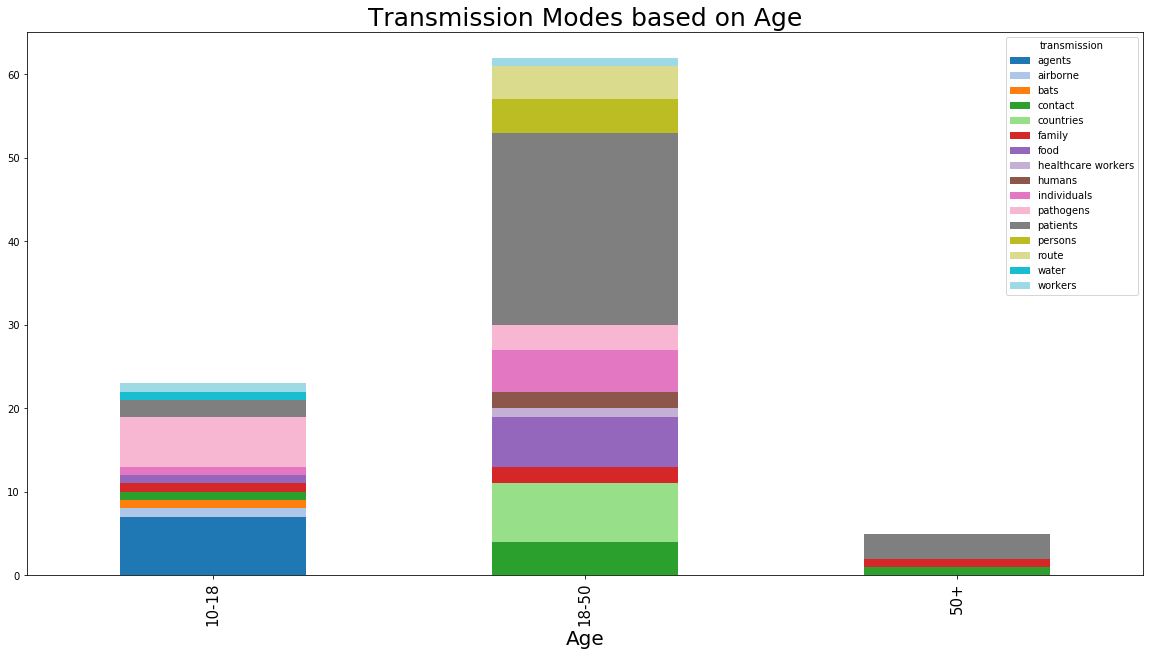

In [20]:
fig = plt.figure(figsize=(15,15))
colors = plt.cm.Paired(np.linspace(0, 1, len(x_important)))
df_count = df_age.groupby(['age', 'transmission']).size().unstack()
ax = df_count.plot(kind='bar', stacked=True, figsize=(20,10), colormap='tab20')
plt.title('Transmission Modes based on Age', size= 25)
ax.set_xlabel('Age', size=20)
plt.xticks(fontsize='15')
plt.savefig('foo.png')

Image of the graph

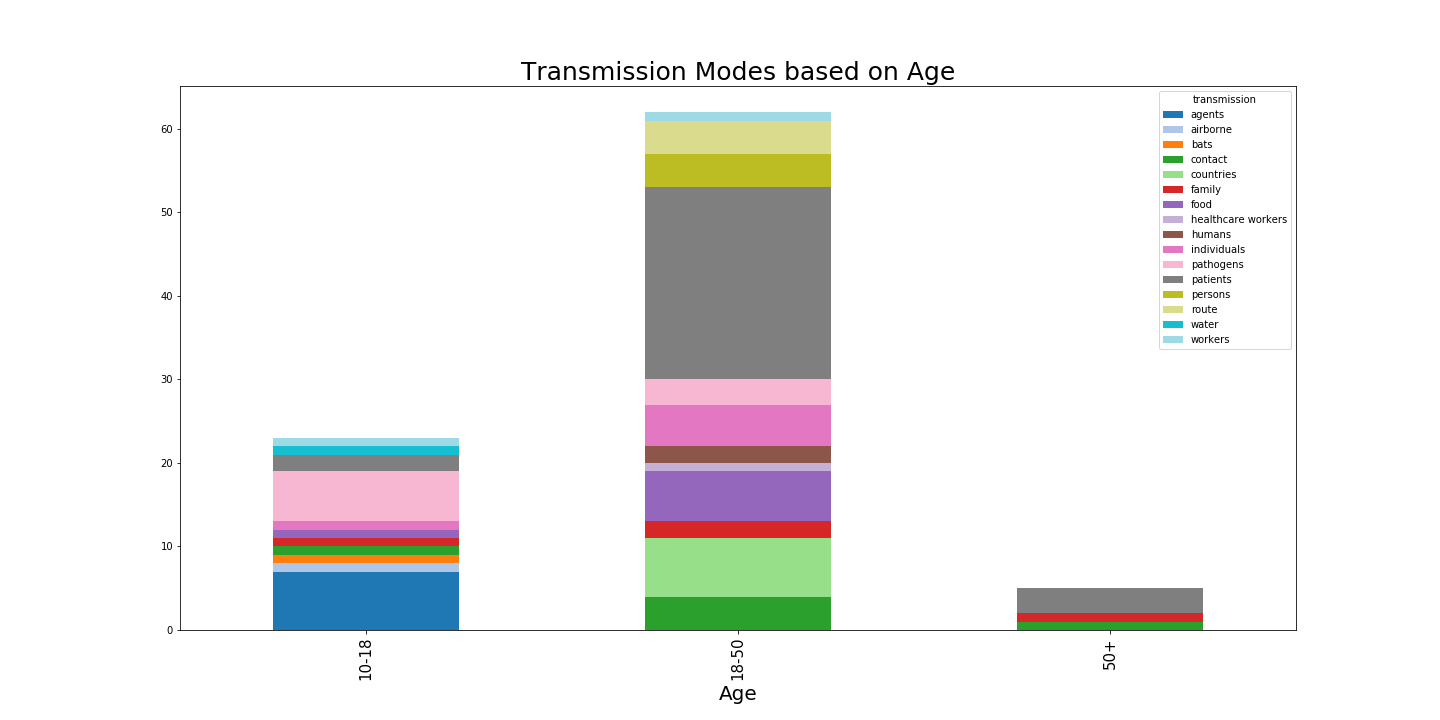

Based on the current information, older individuals (50+) are the most at-risk from COVID-19. When we look at this age group it can be seen that the biggest cause of transmission is patient but this might be because the research articles are referring to the individuals in the age groups as patient. So without any context this category might not be too helpful and thus category patient will be dropped from the modes of transmission. The other causes of transmission in this age group is contact and family; which makes sense considering it is established that community transmission is a possibility with this virus. 

For the 18-50 age group, the important transmission modes are contact, food, and individuals. This indicates that individuals in this age group are most likely to obtain the virus through those three ways. 

In [21]:
# delete category patient
del x_important[0]

# Transmission Modes based on Country

Now let's see the difference in transmission modes based on country. The selected countries below have the highest coronavirus cases based on the following website: https://www.google.com/search?ei=T7uOXpzSOset_Qa33ZTwCw&q=coronavirus+cases&oq=coronavirus+cases&gs_lcp=CgZwc3ktYWIQAzIFCAAQgwEyBQgAEIMBMgUIABCDATICCAAyBQgAEIMBMgUIABCDATICCAAyAggAMgUIABCDATICCAA6BAgAEEc6BwgAEIMBEEM6BAgAEEM6BAgAEAM6BAgAEAo6BwgAEIMBEAo6BQgAEM0COgUIABCRAkoMCBcSCDEwLTY0ZzM4SgoIGBIGMTAtOGc1UJAgWI4vYI4waANwAngAgAFOiAH3BJIBAjExmAEAoAEBqgEHZ3dzLXdpeg&sclient=psy-ab&ved=0ahUKEwjctaPN1troAhXHVt8KHbcuBb4Q4dUDCAw&uact=5

In [22]:
region = ['china', 'united states', 'spain', 'italy', 'germany', 'france', 'iran', 'united kingdom', 'turkey',\
         'canada', 'switerland', 'belgium', 'netherlands']

region_count = dict((re,0) for re in region)

for re in region_count:
    for abstract in df['abstract']:
        if str(re) in abstract:
            region_count[re] += 1

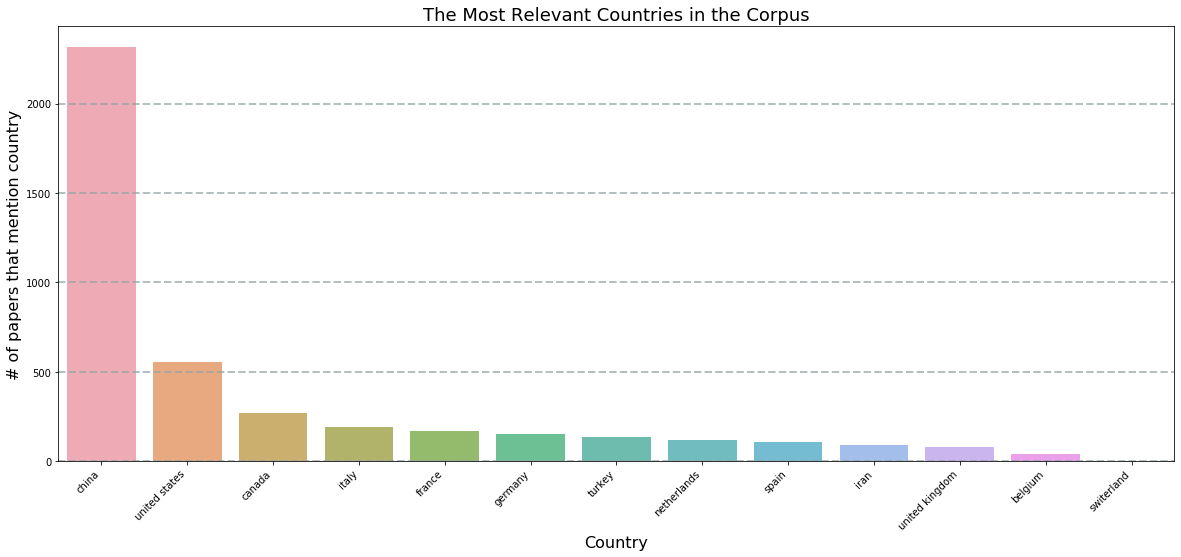

In [23]:
# lets first which countries are mentioned in the corpus
x_region = sorted(region_count, key=region_count.get, reverse=True)
y_region = sorted(region_count.values(), reverse=True)
plt.figure(figsize=(20,8))
sns.barplot(x_region,y_region, alpha=0.8)
plt.title('The Most Relevant Countries in the Corpus',fontsize=18)
plt.ylabel('# of papers that mention country', fontsize=16)
plt.xlabel('Country', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

In [24]:
# switerland and belgium are rarely mentioned in the articles and thus will be eliminated 
del region_count['switerland'], region_count['belgium']

In [25]:
#extract the transmission modes for each country
x_region = list(region_count.keys())
country = []
factors = []
for i in range(len(x_important)):
    for j in range(len(x_region)):
        for abstract in df['abstract']:
            if ((x_region[j] in abstract) and (x_important[i] in abstract)):
                country.append(x_region[j])
                factors.append(x_important[i])

            elif (((x_region[j] in abstract) and (x_important[i] not in abstract)) or ((x_region[j] not in abstract) and (x_important[i] in abstract))):
                country.append(x_region[j])
                factors.append('None')

In [26]:
df_country = pd.DataFrame(columns =['country', 'factors'])
df_country['country'] = np.array(country)
df_country['factors'] = np.array(factors)

In [27]:
# we don't want to label category none
df_country = df_country[~df_country.factors.str.contains("None")]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

<Figure size 1080x1080 with 0 Axes>

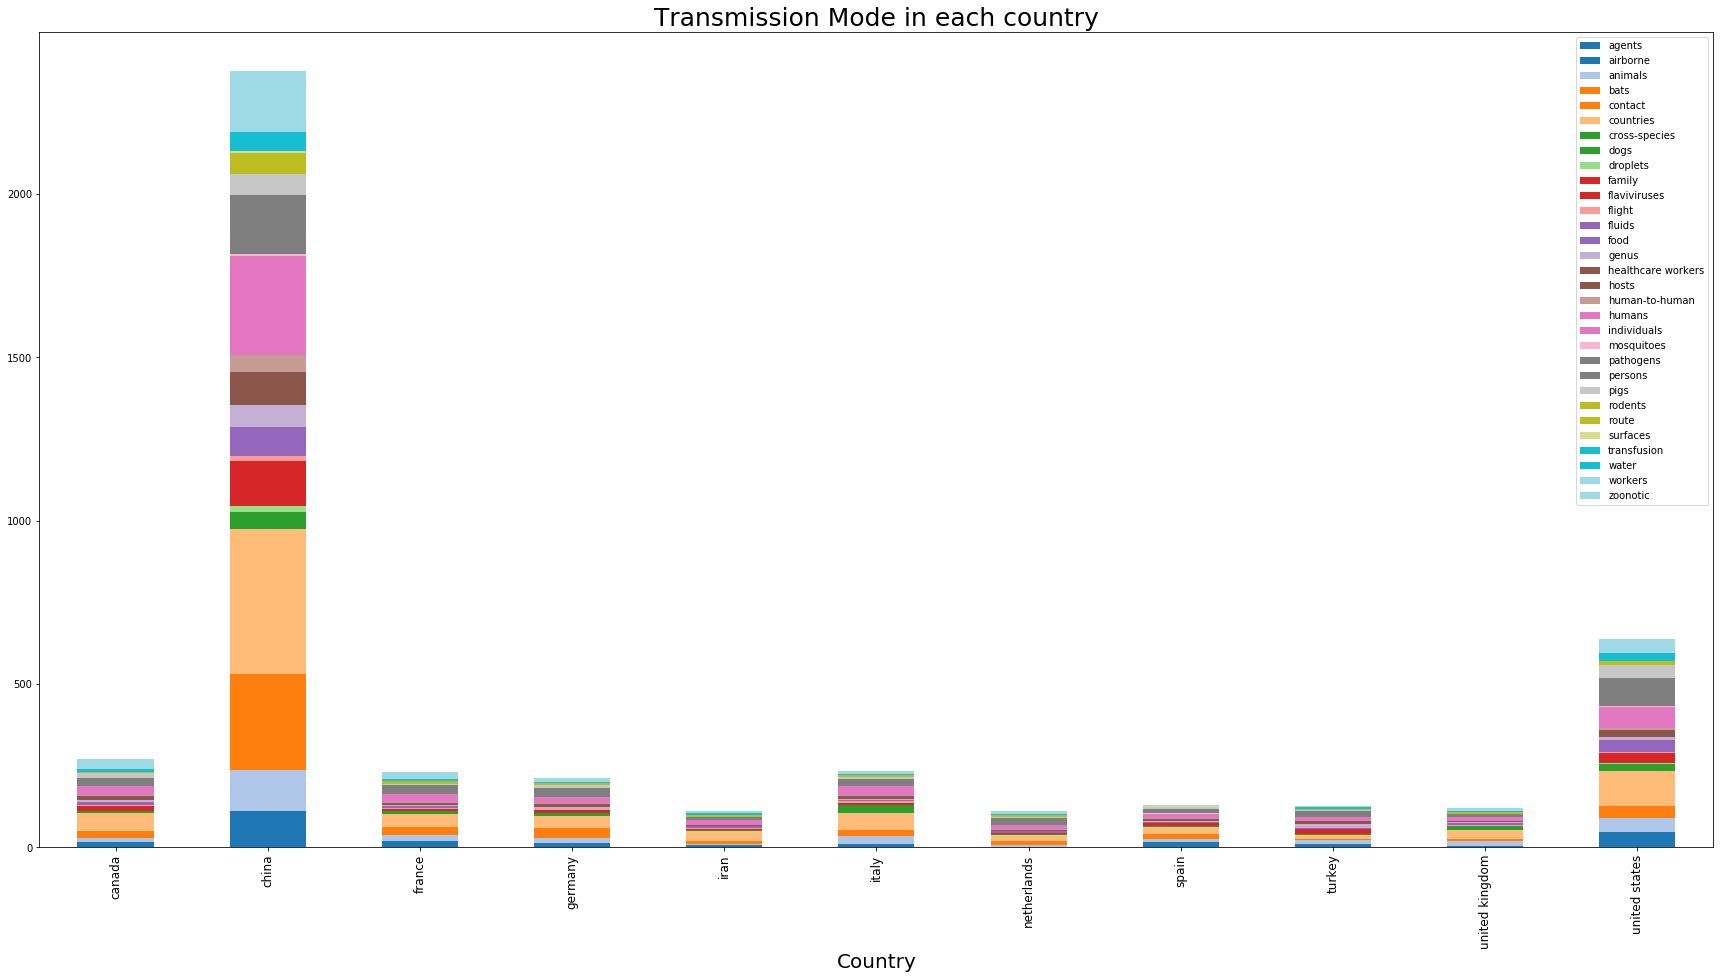

In [28]:
fig = plt.figure(figsize=(15,15))
df_count = df_country.groupby(['country', 'factors']).size().unstack()
ax = df_count.plot(kind='bar', stacked=True, figsize=(30,15), colormap='tab20')
ax.legend(bbox_to_anchor=(1, 1))
plt.title ('Transmission Mode in each country', size=25)
ax.set_xlabel('Country', size=20)
plt.xticks(fontsize='12')

So based on the graph above, we can see that the main transmission mode for all countries is the category countries. This is not suprising as the reason the virus is considered a pandemic is because of the fact that it transmitted from country to country. The second biggest transmission is either contact (e.g. china) or humans (e.g. united states). 

# 3.0 - Model Selection

For this section I will explore three different unsupervised learning alogrithms that will help me understand and  visualize the relationship between transmission modes:

1) Divisive HCA
- this model was chosen as it will cluster transmission factors that appear together in the same abstract

2) Agglomerative HCA
 - this is similar to Divise HCA. The main difference is that in divisive HCA each transmission mode begins in one cluster and splits are performed recursively as one moves down the hierarchy. Whereas in Agglormertive HCA the modes begin in their own cluster and merge together as they move up the hierarchy
 - I found that I had better control over the clusters using this method. Being able to define the number of cluster allowed for more informative results (i.e. more clusters resulted for better insights )
 
3) DBSCAN
- this algorithm was used to see how the clusters would change if they were based on proximity


The main reason three models were selected was to see if different insights can be extracted; relaying on one model for answers can be limiting

## 3.1 - Divisive HCA

In [29]:
#Empty Distance metric used in the heirarchical clustering algorithm
risk_dist = np.zeros((len(x_important),len(x_important)), dtype=float)

df_risk = pd.DataFrame(risk_dist, columns=x_important, index=x_important)

In [30]:
#Helper function that will calculate the distance

def cumulative_dist(risk1, risk2, df):
    cum_sum = 0
    number_of_papers = 0
    if risk1 == risk2: return 0
    
    for abstract in df['abstract']:
        if ((risk1 in abstract) and (risk2 in abstract)):
            number_of_papers += 1
            cum_sum -= 1
        elif (((risk1 in abstract) and (risk2 not in abstract)) or ((risk1 not in abstract) and (risk2 in abstract))):
            number_of_papers += 1
            cum_sum += 1
    
    return cum_sum/number_of_papers

risk_dist = np.zeros((len(x_important),len(x_important)),float)
for i in range(len(x_important)):
    for j in range(len(x_important)):
         risk_dist[i][j] = cumulative_dist(x_important[i],x_important[j], df)     

In [31]:
i = 0
for x in x_important:
    df_risk[x] = np.power (risk_dist[i],9)
    i += 1

In [32]:
distance = np.power(risk_dist,9) 
Y = sch.linkage(distance, method='ward')

Text(0.5, 1.0, 'Dendrogram Displaying COVID-19 Transmission Mode Clusters')

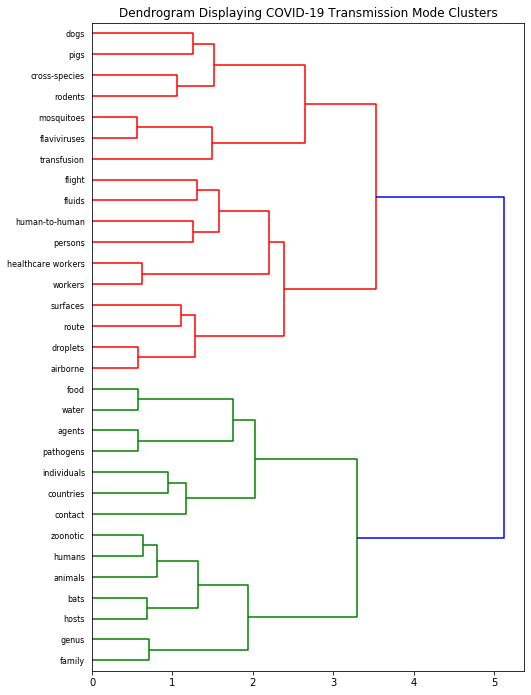

In [33]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

Z1 = sch.dendrogram(Y, orientation='right',  labels=x_important)

ax1.set_title("Dendrogram Displaying COVID-19 Transmission Mode Clusters")

Divisive HCA did a good job of clustering terms that relate to one another, such as genus and family or bats and hosts (bats are believed to be the origin of the virus).

Since we already know that contact is the fastest way to transmit the virus, we can look at categories that represent a form of contact. For example categories food and water are usually a form of indirect contact and thus I would suggest to the general public to wipe down their groceries before they place them in the fridge or cabinates. 

Also we can see that droplets and airborne are clustered together indicating that virus is potentially airborne because droplets can fly through the air. Thus I would suggest to the government to make masks avaliable to the general public in order to protect themselves and the people they are around. Realistically these masks should not be of the same quality that healthcare professionals use as we don't want to embed on their supply (which is essential for their practice)

## 3.2 Agglomerative HCA

In [34]:
# apply PCA in order to visualize data on 2D plane
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state=42) 
X_PCA = pca.fit_transform(distance) 
X_PCA = pd.DataFrame(X_PCA) 
X_PCA.columns = ['P1', 'P2'] 

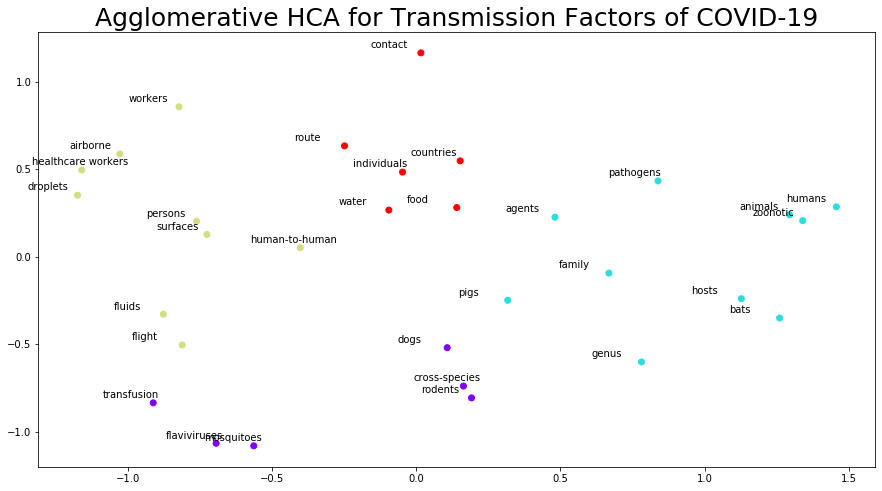

In [35]:
from sklearn.cluster import AgglomerativeClustering 
# the ideal number of clusters were found through trial and error. It was adjusted until clusters made logical sense
ac3 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(15, 8)) 
plt.scatter(X_PCA['P1'], X_PCA['P2'], 
           c = ac3.fit_predict(X_PCA), cmap ='rainbow') 
l = df_risk.columns
for label, x, y in zip(l, X_PCA['P1'], X_PCA['P2']):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-50, 5),
        textcoords = 'offset points'
    )
plt.title('Agglomerative HCA for Transmission Factors of COVID-19', size=25)
plt.show() 

Many of the grouped terms in divisive HCA are also grouped in agglormative HCA, however aggloramative allows us to better visualize the relationship between grouped terms. From Agglormative Clustering we can see that contact-based (direct or otherwise) catergories are clustered togther (green clusters). This specific cluster tells us they various ways an individual can obtain the virus through contact. So if someone can contract the virus from the human-to-human interaction they can also obtain it through fluids (i.e. droplets) or surfaces or worker. From this, I would suggest to the general public to regularly wipe down their surfaces either at home or work. Further I would recommend to the government to closed down workplaces that are not essential (i.e. make the essential businesses list shorter). Also, we can see that category airborne, healthcare workers, and droplets are clustered closely together, indicating that healthcare workers are likely to contract COVID-19 through those modes. Thus the government needs to make healthcare equipment (such as masks and gowns) a upmost priorty as healthcare workers pay a huge role in stablizing the spread of the virus (and thus their health is essential). Further, category animals are clustered with family, which indicates that animals can transmit the virus the same way that family members can with one another. Therefore I would suggest that pet owners quaratine their pets and not wonderless outside aimless (which specifically cats are known to do). 

# DBSCAN Clustering

In [36]:
from sklearn.cluster import DBSCAN

In [37]:
# the epislon threshold was determined through trial and error, it was adjusted until the clustering 
db = DBSCAN(eps=0.35, metric="precomputed", min_samples=2)
results= db.fit(distance)

In [38]:
# Get output
mask = np.zeros_like(results.labels_, dtype=bool)
mask[db.core_sample_indices_] = True
labels = results.labels_ + 1

In [39]:
df_trans = pd.DataFrame(x_important, columns=['transmission mode'])

In [40]:
# Add labels to dataframe
df_trans['DBSCAN_L_Clusters'] = labels

In [41]:
for i in range(len(np.unique(labels))):
    print('\033[1m'+"Cluster %d:" % i),
    for ind in range (len(df_trans[df_trans['DBSCAN_L_Clusters']==i]['transmission mode'].values)):
        print('\033[0m'+' %s' % df_trans[df_trans['DBSCAN_L_Clusters']==i]['transmission mode'].values[ind]),
    print

Cluster 0:
 countries
 dogs
 persons
 surfaces
 human-to-human
 fluids
 flight
 transfusion
Cluster 1:
 pathogens
 humans
 agents
 animals
 family
 zoonotic
 hosts
 pigs
 bats
 genus
 rodents
 cross-species
Cluster 2:
 individuals
 contact
 workers
 healthcare workers
Cluster 3:
 water
 food
Cluster 4:
 route
 airborne
 droplets
Cluster 5:
 flaviviruses
 mosquitoes


The two HCA algorithms did a sufficient job at allowing me to gather insights from their clusters, but it seems that DBSCAN has more logical clusters that HCA. From above we can see that cluster 1 includes the animal-to-human transmission modes, whereas cluster 2 includes the direct contact-type transmission modes, cluster 3 includes in-direct contact type, cluster 4 includes the particle-type* transmission, and cluster 5 includes ticks-type transmission. 

*category route is referring to the route that COVID-19 takes once its inside the body

# General Insights from HCA
- The  Agglormative HCA was the most insightful model, the clusters generated were logical but also they were flexible enough to show relationships between transmission modes that one would otherwise think are unrelated
- Wipe groceries before placing them in fridge or cabinet as food and water is a form of transmission 
- Wipe down surface at home or work as surfaces is a form of transmission 
- Everyone should wear mask when they go outside, the government needs to masks avaliable to the general public
- Tighten the essential businesses list (more people should stay at home)
- Healthcare equipment should be top priority of the government, as healthcare workers are at risk of contract the virus through contact or droplets. 
- Pets should also be quarantined as they can transmit to humans. 